<a href="https://colab.research.google.com/github/rikurzt/Finacial_analyze_course_HW/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_HW2_7113029027%E6%9D%8E%E5%86%A0%E5%BB%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#證交所API

In [ ]:
import pandas as pd
import requests
import json
from datetime import datetime


In [ ]:
def call_twse_api(stock_id=2330, year=2024, month=9):
  """Calls the TWSE API to retrieve stock data for a specific month."""
  url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={year}{month:02}01&stockNo={stock_id}"
  try:
    response = requests.get(url)
    response.raise_for_status()
    return response.json()
  except requests.exceptions.RequestException as e:
    print(f"Error calling API: {e}")
    return None

In [ ]:
respond = call_twse_api("0050")

In [ ]:
df = pd.DataFrame(respond.get('data'))
df.columns = respond.get('fields')
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"8,406,621","1,522,822,665",181.90,182.45,180.50,180.85,-0.50,"11,557"
1,113/09/03,"9,951,882","1,796,839,463",181.00,181.50,179.70,180.05,-0.80,"10,334"
2,113/09/04,"34,040,370","5,856,531,211",171.00,173.80,170.00,171.25,-8.80,"76,198"
3,113/09/05,"9,617,832","1,667,185,291",172.85,174.65,171.75,172.30,+1.05,"19,940"
4,113/09/06,"8,941,475","1,556,560,053",173.00,174.90,171.85,174.75,+2.45,"13,003"
5,113/09/09,"16,353,482","2,796,547,163",170.40,172.10,170.30,172.05,-2.70,"27,362"
6,113/09/10,"9,866,281","1,698,214,149",173.40,173.40,171.15,172.35,+0.30,"16,346"
7,113/09/11,"5,427,964","933,696,240",172.35,172.50,171.50,171.85,-0.50,"11,868"
8,113/09/12,"16,337,565","2,900,529,886",176.10,178.65,176.10,178.30,+6.45,"15,442"
9,113/09/13,"4,775,976","852,453,956",179.00,179.35,177.85,178.40,+0.10,"8,283"


In [ ]:
def get_stock_data(stock_id, start_year, end_year):
  """Retrieves stock data for a given stock ID within a year range."""
  all_data = []
  for year in range(start_year, end_year + 1):
    for month in range(1, 13):
      data = call_twse_api(stock_id, year, month)
      if data and 'data' in data:
        all_data.extend(data['data'])
  return all_data

In [ ]:

stock_data = get_stock_data('0050', start_year =2022, end_year = 2023
)

df = pd.DataFrame(stock_data, columns=['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'])


# Yahoo爬蟲

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
stock_id = "2330"
url = "https://tw.stock.yahoo.com/quote/{stock_id}.TW".format(stock_id=stock_id)
response = requests.get(url)
html_content = response.text

In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
table = soup.find('div', {'class': 'Fx(n) W(316px) Bxz(bb) Pstart(16px) Pt(12px)'})
rows = table.find_all('li')


data = []

for row in rows:
    cells_col = row.find_all('span')
    data.append([cell.text.strip() for cell in cells_col])

data = list(zip(*data))
data

[('成交',
  '開盤',
  '最高',
  '最低',
  '均價',
  '成交金額(億)',
  '昨收',
  '漲跌幅',
  '漲跌',
  '總量',
  '昨量',
  '振幅'),
 ('1,000',
  '1,020',
  '1,025',
  '1,000',
  '1,010',
  '361.03',
  '1,015',
  '1.48%',
  '15.00',
  '35,720',
  '38,001',
  '2.46%')]

In [ ]:
df_Y = pd.DataFrame(data[1:], columns=data[0])
df_Y

,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,"1,000","1,020","1,025","1,000","1,010",361.03,"1,015",1.48%,15.00,"35,720","38,001",2.46%


## 取得月報表

In [ ]:
stock_id = "2330"
url = "https://tw.stock.yahoo.com/quote/{stock_id}.TW/income-statement".format(stock_id=stock_id)
response = requests.get(url)
html_content = response.text


In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
table = soup.find('div', {'class': 'Pos(r) Ov(h)'})
header = table.find('div', {'class': 'table-header Ovx(s) Ovy(h) W(100%)'})
rows = table.find('div', {'class': 'table-body-wrapper'})

data = []



for row in rows.find_all('li'):
    cells_col = row.find_all('span')
    data.append([cell.text.strip() for cell in cells_col])




In [ ]:
df_m = pd.DataFrame(data, columns=header.text.split())
df_m

,年度/月份2024,Q22024,Q12023,Q42023,Q32023,Q22023,Q12022,Q42022,Q32022,Q22022,...,Q42021,Q32021,Q22021,Q12020,Q42020,Q32020,Q22020,Q12019,Q42019,Q3
0,營業收入,"673,510,177","592,644,201","625,528,856","546,732,758","480,841,254","508,632,973","625,531,868","613,142,743","534,140,808",...,"438,189,306","414,670,379","372,145,122","362,410,230","361,533,057","356,426,204","310,698,367","310,597,183","317,237,065","293,045,439"
1,營業毛利,"358,124,478","314,505,269","331,767,925","296,642,464","260,199,847","286,500,392","389,184,929","370,498,717","315,467,994",...,"230,679,228","212,848,684","186,234,135","189,775,219","195,188,826","190,480,670","164,692,825","160,784,181","159,240,985","139,432,161"
2,營業費用,"70,295,310","65,357,281","71,621,021","68,708,791","58,194,560","55,309,344","64,535,382","60,186,462","53,374,518",...,"47,877,762","41,649,916","40,583,423","39,111,833","38,321,439","40,891,355","33,520,709","32,323,046","34,942,621","31,378,953"
3,營業利益,"286,555,542","249,018,306","260,204,503","228,064,903","201,958,043","231,238,157","325,040,770","310,324,214","262,123,749",...,"182,771,954","171,003,548","145,667,205","150,538,190","157,120,174","150,047,349","131,094,538","128,521,637","124,243,722","107,887,292"
4,稅後淨利,"247,661,438","225,221,263","238,306,201","210,795,274","181,717,006","206,949,036","295,878,482","280,968,407","237,180,252",...,"166,373,515","156,479,154","134,481,716","139,738,749","142,824,524","137,378,151","120,892,514","117,062,893","116,078,194","101,102,454"


# 計算技術指標（SMA、RSI、MACD）

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [ ]:
def calculate_sma(data, window):

  return ta.sma(data['收盤價'], length=window)

def calculate_rsi(data, window):
  return ta.rsi(data['收盤價'], length=window)

def calculate_macd(data, short_window, long_window, signal_window):
  try:
      macd_df = ta.macd(data['收盤價'], fast=short_window, slow=long_window, signal=signal_window)
      return macd_df['MACD_12_26_9'], macd_df['MACDh_12_26_9'], macd_df['MACDs_12_26_9']
  except (KeyError, TypeError):
    return None, None, None

def calculate_ema(data, window):
  return ta.ema(data['收盤價'], length=window)



df['收盤價'] = pd.to_numeric(df['收盤價'])


df['SMA_5'] = calculate_sma(df, 5)


df['RSI_14'] = calculate_rsi(df, 14)


df['MACD_line'], df['Histogram'], df['Signal_line'] = calculate_macd(df, 12, 26, 9)

df['EMA'] = calculate_ema(df, 10)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   日期           485 non-null    object 
 1   成交股數         485 non-null    object 
 2   成交金額         485 non-null    object 
 3   開盤價          485 non-null    object 
 4   最高價          485 non-null    object 
 5   最低價          485 non-null    object 
 6   收盤價          485 non-null    float64
 7   漲跌價差         485 non-null    object 
 8   成交筆數         485 non-null    object 
 9   SMA_5        481 non-null    float64
 10  RSI_14       471 non-null    float64
 11  MACD_line    460 non-null    float64
 12  Histogram    452 non-null    float64
 13  Signal_line  452 non-null    float64
 14  EMA          476 non-null    float64
dtypes: float64(7), object(8)
memory usage: 57.0+ KB
None


In [ ]:
import matplotlib.pyplot as plt


# 繪製K線圖

In [ ]:
# prompt: #計算KD

def calculate_kd(df, n=9):
  df['最高價'] = pd.to_numeric(df['最高價'])
  df['最低價'] = pd.to_numeric(df['最低價'])
  df['收盤價'] = pd.to_numeric(df['收盤價'])

  df['RSV'] = ((df['收盤價'] - df['最低價'].rolling(n).min()) /
              (df['最高價'].rolling(n).max() - df['最低價'].rolling(n).min())) * 100
  df['K'] = 50
  df['D'] = 50

  for i in range(n, len(df)):
      df['K'].iloc[i] = (df['K'].iloc[i - 1] * 2 / 3) + (df['RSV'].iloc[i] * 1 / 3)
      df['D'].iloc[i] = (df['D'].iloc[i - 1] * 2 / 3) + (df['K'].iloc[i] * 1 / 3)



In [ ]:
!pip install mpl_finance

In [ ]:
import pandas as pd
import mpl_finance as mpf
import matplotlib.pyplot as plt
import matplotlib

In [ ]:

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib


matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-09-29 15:54:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.180.138, 64.233.180.139, 64.233.180.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-29 15:54:51--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  87.5MB/s    in 0.2s    

2024-09-29 15:5

In [ ]:
calculate_kd(df)

<ipython-input-87-38931eb49cc6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K'].iloc[i] = (df['K'].iloc[i - 1] * 2 / 3) + (df['RSV'].iloc[i] * 1 / 3)
<ipython-input-87-38931eb49cc6>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '61.49425287356334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['K'].iloc[i] = (df['K'].iloc[i - 1] * 2 / 3) + (df['RSV'].iloc[i] * 1 / 3)
<ipython-input-87-38931eb49cc6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D'].iloc[i] = (df['D'].iloc[i - 1] * 2 /

<ipython-input-92-863d551abfa4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df.get("日期")[::30])
<ipython-input-92-863d551abfa4>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df.get("日期")[::30])


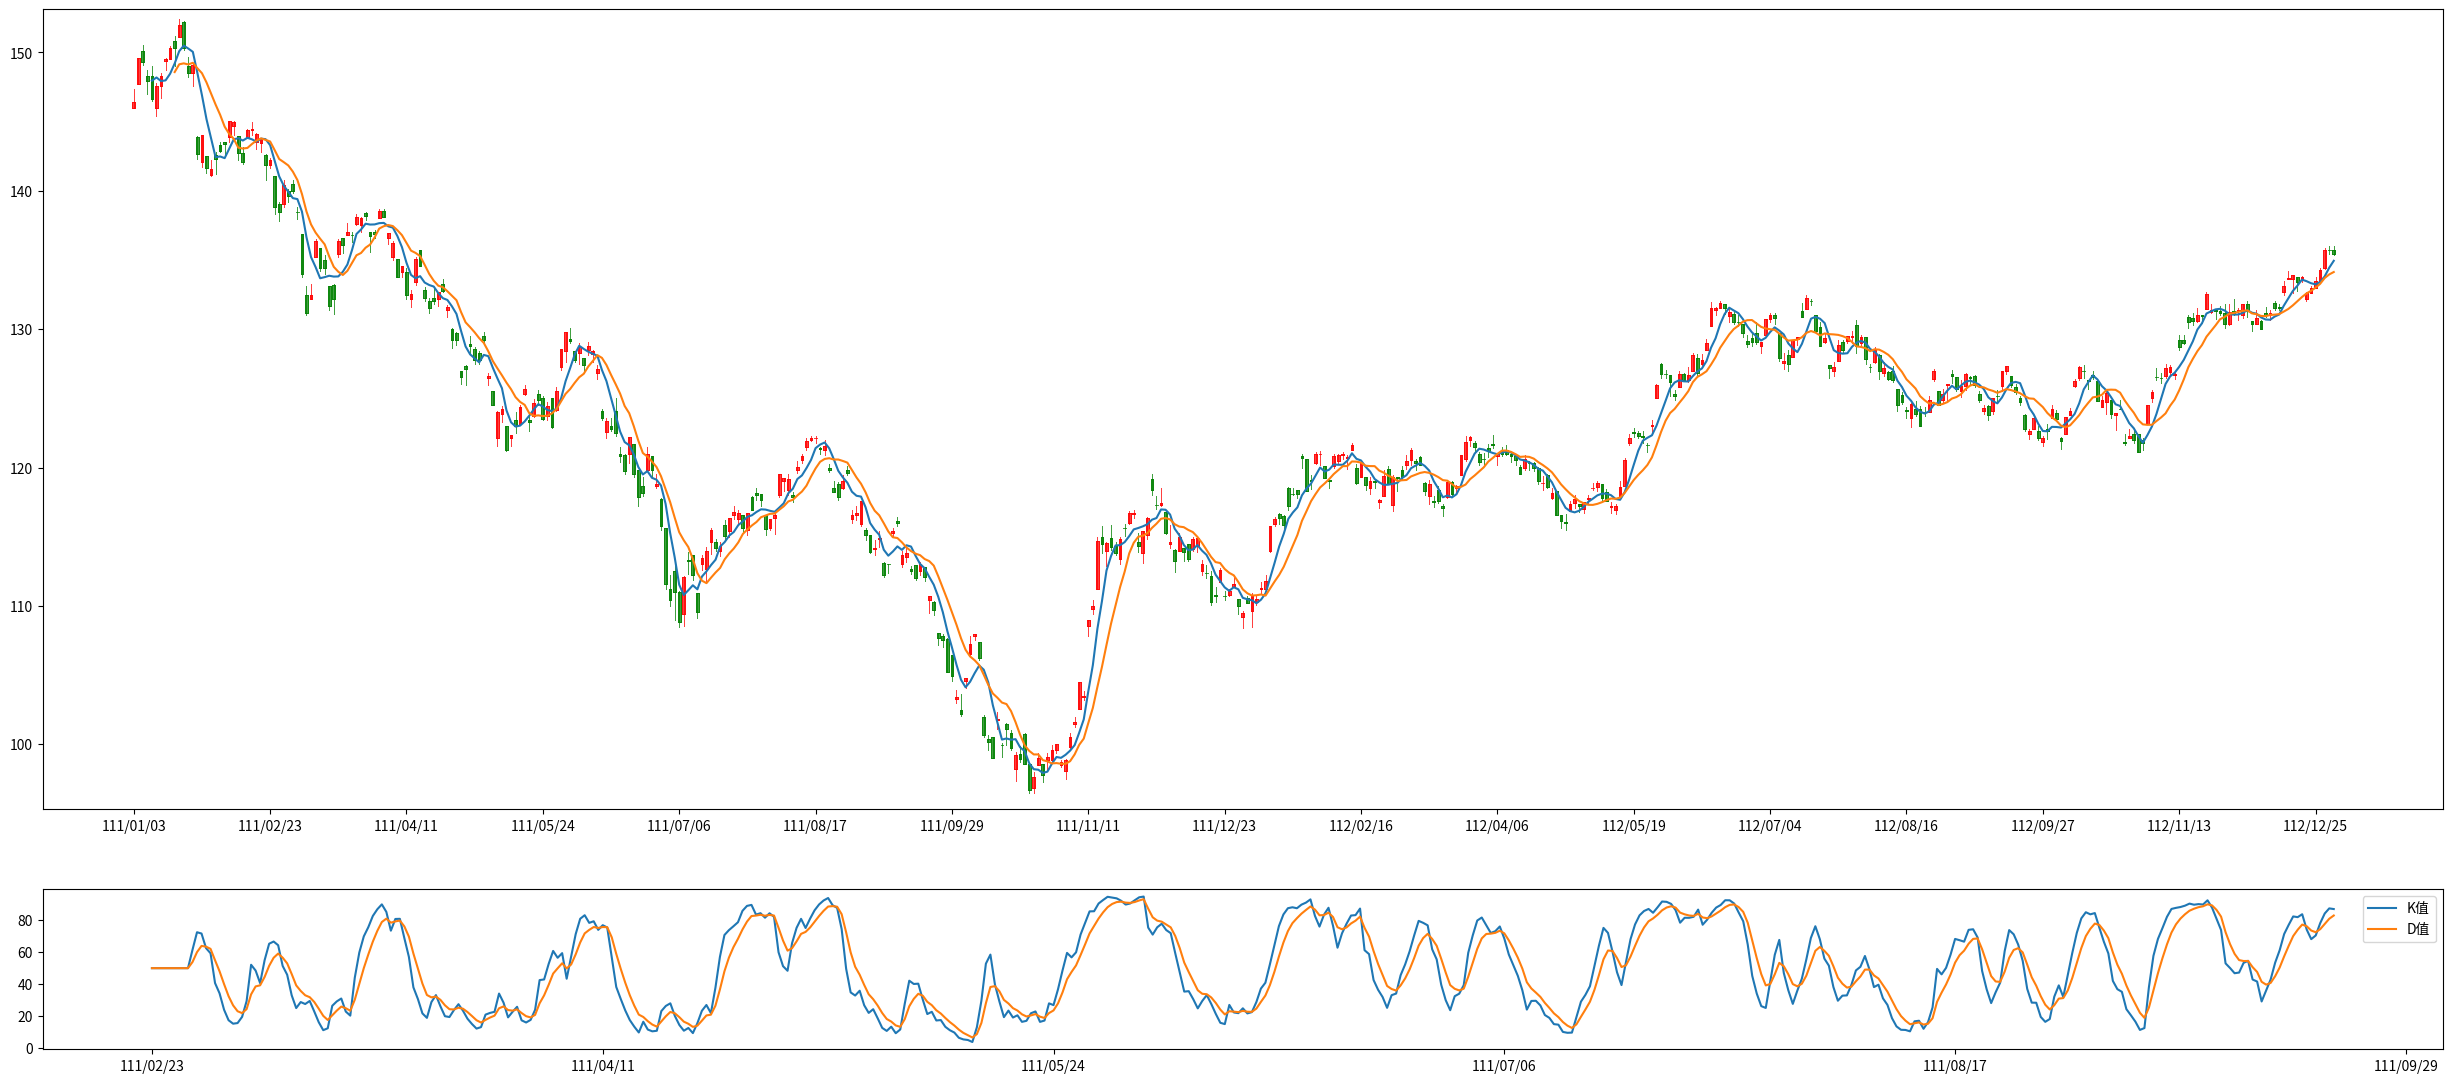

In [ ]:
for col in ['開盤價', '收盤價', '最高價', '最低價']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

fig = plt.figure(figsize=(24, 8))

ax = fig.add_axes([1,0.5,1,1])
ax2 = fig.add_axes([1,0.2,1,0.2])


ax.set_xticks(range(0, len(df.index), 30))
ax.set_xticklabels(df.get("日期")[::30])
mpf.candlestick2_ochl(ax, df['開盤價'], df['收盤價'], df['最高價'],
                      df['最低價'], width=0.6, colorup='r', colordown='g', alpha=0.75);


ax.plot(df['日期'], calculate_sma(df, 5), label='SMA_5')
ax.plot(df['日期'], calculate_sma(df, 10), label='SMA_10')

ax2.plot(df['K'], label='K值')
ax2.plot(df['D'], label='D值')
ax2.set_xticklabels(df.get("日期")[::30])
ax2.set_xticklabels(df.get("日期")[::30])

plt.legend()
plt.show()


# 3. 技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。使用技術指標作為特徵來預測第 n 天的股價

In [ ]:
!pip install xgboost
!pip install scikit-learn
!pip install scikit-learn
!pip install optuna

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import optuna
from optuna.samplers import TPESampler

In [ ]:

stock_data = get_stock_data('0050', start_year =2022, end_year = 2023)


In [ ]:
def change_format(raw_data):

  #train_df to float
  train_df = pd.DataFrame(raw_data, columns=['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'])

  for column in ['開盤價', '最高價', '最低價', '收盤價', '漲跌價差']:
      train_df[column] = pd.to_numeric(train_df[column], errors='coerce')
  for column in ['成交股數', '成交金額', '成交筆數']:
      train_df[column] = train_df[column].astype(str).str.replace(',', '').astype(int)

  train_df.drop(columns=['日期'], inplace=True)

  return train_df

train_df=change_format(stock_data)


In [ ]:
train_df


,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,7064552,1034974917,146.00,147.35,146.00,146.40,0.90,8298
1,10122789,1507398153,147.70,149.60,147.70,149.60,3.20,10438
2,11730618,1755680824,150.10,150.55,149.10,149.30,-0.30,12614
3,9085138,1342084958,148.30,148.75,147.00,147.90,-1.40,13496
4,7435645,1095365963,148.30,149.00,146.50,146.60,-1.30,12008
...,...,...,...,...,...,...,...,...
480,8406012,1122521003,133.00,133.80,132.95,133.50,0.55,8464
481,17326648,2325240676,133.50,134.40,133.50,134.25,0.75,11845
482,30857192,4177189577,134.40,135.90,134.35,135.75,1.50,16671
483,15353146,2085248437,135.75,136.00,135.45,135.75,0.00,9803


In [ ]:
#cal matrix
def calculate_matrix(df):
  df['SMA_5'] = calculate_sma(df, 5).fillna(0)
  df['SMA_10'] = calculate_sma(df, 10).fillna(0)
  df['SMA_20'] = calculate_sma(df, 20).fillna(0)

  df['RSI_14'] = calculate_rsi(df, 14).fillna(0)


  df['MACD_line'], df['Histogram'], df['Signal_line'] = calculate_macd(df, 12, 26, 9)

  df['MACD_line'] = df['MACD_line'].fillna(0)
  df['Histogram'] = df['Histogram'].fillna(0)
  df['Signal_line'] = df['Signal_line'].fillna(0)

  df['EMA'] = calculate_ema(df, 10).fillna(0)


calculate_matrix(train_df)

In [ ]:
def rename_column(df):
#remane column name to english
  df.columns = ['volume', 'volprice', 'open', 'high', 'low', 'close', 'change', 'num', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI_14', 'MACD_line', 'Histogram', 'Signal_line', 'EMA']
rename_column(train_df)

In [ ]:
features = [ 'change','open', 'high', 'low','SMA_5','SMA_10','SMA_20', 'RSI_14','MACD_line','EMA', 'close']#last feature is target of y


In [ ]:
def normalize_data(df):
  newdf = df.copy()
  min_max_scaler = MinMaxScaler()
  newdf['volume'] = newdf['volume'].astype(str).str.replace(',', '').astype(int)
  newdf['volprice'] = newdf['volprice'].astype(str).str.replace(',', '').astype(int)


  newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
  newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
  newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
  newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
  newdf['num'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
  newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
  newdf['volprice'] = min_max_scaler.fit_transform(df.volprice.values.reshape(-1,1))

  newdf['SMA_5'] = min_max_scaler.fit_transform(df.SMA_5.values.reshape(-1,1))
  newdf['SMA_10'] = min_max_scaler.fit_transform(df.SMA_10.values.reshape(-1,1))
  newdf['SMA_20'] = min_max_scaler.fit_transform(df.SMA_20.values.reshape(-1,1))
  newdf['RSI_14'] = min_max_scaler.fit_transform(df.RSI_14.values.reshape(-1,1))
  newdf['MACD_line'] = min_max_scaler.fit_transform(df.MACD_line.values.reshape(-1,1))
  newdf['Histogram'] = min_max_scaler.fit_transform(df.Histogram.values.reshape(-1,1))
  newdf['Signal_line'] = min_max_scaler.fit_transform(df.Signal_line.values.reshape(-1,1))
  newdf['EMA'] = min_max_scaler.fit_transform(df.EMA.values.reshape(-1,1))

  return newdf[features]

normalized_df = normalize_data(train_df)
normalized_df

,change,open,high,low,SMA_5,SMA_10,SMA_20,RSI_14,MACD_line,EMA,close
0,0.90,0.887986,0.907169,0.906593,0.000000,0.000000,0.000000,0.000000,0.516056,0.000000,0.898734
1,3.20,0.918699,0.948529,0.937729,0.000000,0.000000,0.000000,0.000000,0.516056,0.000000,0.956600
2,-0.30,0.962060,0.965993,0.963370,0.000000,0.000000,0.000000,0.000000,0.516056,0.000000,0.951175
3,-1.40,0.929539,0.932904,0.924908,0.000000,0.000000,0.000000,0.000000,0.516056,0.000000,0.925859
4,-1.30,0.929539,0.937500,0.915751,0.983188,0.000000,0.000000,0.000000,0.516056,0.000000,0.902351
...,...,...,...,...,...,...,...,...,...,...,...
480,0.55,0.653117,0.658088,0.667582,0.885374,0.891122,0.897815,0.817912,0.670760,0.889289,0.665461
481,0.75,0.662150,0.669118,0.677656,0.886504,0.892965,0.898835,0.859617,0.675541,0.890979,0.679024
482,1.50,0.678410,0.696691,0.693223,0.889162,0.895779,0.900400,0.928736,0.693248,0.894187,0.706148
483,0.00,0.702800,0.698529,0.713370,0.893348,0.897521,0.901896,0.928736,0.705102,0.896813,0.706148


In [ ]:
def data_process(raw_df):
  train_df = raw_df.copy()
  train_df = change_format(raw_df)
  calculate_matrix(train_df)
  rename_column(train_df)
  return train_df

In [ ]:
#Split Data
def data_helper(df, time_frame):


  number_features = len(df.columns)


  datavalue = df.values
  print('datavalue:',len(datavalue))

  result = []
  # time_frame
  for index in range( len(datavalue) - (time_frame+1) ):
    result.append(datavalue[index: index + (time_frame+1) ])

  result = np.array(result)
  print('result:',result. shape[0])
  number_train = round(0.9 *result.shape[0])
  print('number_train:',number_train)
  x_train = result[:int(number_train),0]
  y_train = result[:int(number_train),1][:,-1] #Last feature is y
  print('x_train. shape:',x_train.shape)
  print('y_train. shape', y_train. shape)

  x_test = result[int(number_train):,0]
  y_test = result[int(number_train): , 1][ :,-1]
  print('x_test.shape:',x_test.shape)
  print('y_test.shape:',y_test.shape)

  return [x_train, y_train, x_test, y_test]

X_train, y_train, X_test, y_test = data_helper(normalized_df, 5)
X_train

datavalue: 485
result: 479
number_train: 431
x_train. shape: (431, 11)
y_train. shape (431,)
x_test.shape: (48, 11)
y_test.shape: (48,)


array([[ 0.9       ,  0.88798555,  0.90716912, ...,  0.51605563,
         0.        ,  0.89873418],
       [ 3.2       ,  0.91869919,  0.94852941, ...,  0.51605563,
         0.        ,  0.95660036],
       [-0.3       ,  0.96205962,  0.96599265, ...,  0.51605563,
         0.        ,  0.95117541],
       ...,
       [ 1.05      ,  0.53568202,  0.53952206, ...,  0.5000409 ,
         0.83396653,  0.55334539],
       [-0.35      ,  0.54471545,  0.54044118, ...,  0.5269957 ,
         0.83683149,  0.54701627],
       [-0.7       ,  0.53206865,  0.52022059, ...,  0.54062561,
         0.83832366,  0.53435805]])

In [ ]:
def denormalize(df, norm_value):
  original_value = df['close'].values.reshape(-1,1)
  norm_value = norm_value. reshape(-1,1)

  min_max_scaler = MinMaxScaler()
  min_max_scaler.fit_transform(original_value)
  denorm_value = min_max_scaler.inverse_transform(norm_value)

  return denorm_value

In [ ]:
def objective(model =XGBRegressor(max_depth =50) ):

  #train
  model.fit(X_train, y_train)

  #testing
  y_pred = model.predict(X_test)

  #Denormalized
  denorm_pred = denormalize(train_df, y_pred)
  denorm_ytest =denormalize(train_df, y_test)

  rmse = np.sqrt(mean_squared_error(denorm_ytest, denorm_pred))
  print("TEST RMSE:", rmse)
  return model

model =objective()

TEST RMSE: 1.2611415017936325


In [ ]:
#Plot
import matplotlib.pyplot as plt
%matplotlib inline
def plot_result(denorm_pred, denorm_ytest):
  plt.plot(denorm_pred, color='red', label='Prediction')
  plt.plot(denorm_ytest, color='blue', label='Answer')
  plt.legend(loc='best')
  plt.show()

In [ ]:
#Evaluation
stock_id="0050"
year=2024
month=9

[179.27412 177.23045 170.27173 172.30724 174.80318 168.81033 172.65823
 171.65149 176.58513 177.08504 177.20282 176.54015 177.30531 182.15721
 181.89128 181.91933 186.72809 187.69365 187.25739 182.1284  174.95686
 162.36148 163.62715 173.58188 168.45189 174.68962 175.82196 176.29749
 178.73466 177.59938 181.75034 181.67818 182.12334 180.23279 179.94278
 176.8274  180.00684 177.8666  180.09584 176.95546 180.04715]


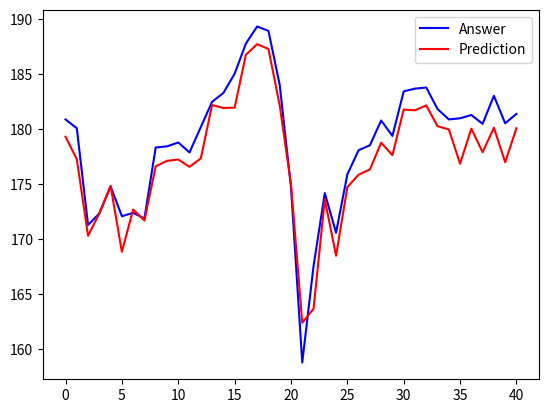

EVAL RMSE: 2.0464641163967308


In [ ]:
def eva(model):
  eva_data=[]

  eva_data.extend(call_twse_api(stock_id, year, month)['data'])
  eva_data.extend(call_twse_api(stock_id, year, month-1)['data'])
  eva_data = pd.DataFrame(eva_data)
  eva_data.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
  eva_data = data_process(eva_data)
  norm_eva = normalize_data(eva_data)


  y_pred = model.predict(norm_eva.values)

  denorm_pred = denormalize(eva_data, y_pred)
  print(denorm_pred.reshape(-1))

  plt.plot(eva_data['close'].values.astype(float), color='blue', label='Answer')
  plt.plot(denorm_pred.reshape(-1), color='red', label='Prediction')
  plt.legend(loc='best')
  plt.show()
  rmse = np.sqrt(mean_squared_error(eva_data['close'].values.astype(float), denorm_pred.reshape(-1)))
  print("EVAL RMSE:", rmse)

eva(model)

TEST RMSE: 1.2729555829444568
[179.85132 177.2562  169.82977 171.85356 174.18173 168.26295 171.54047
 170.59804 175.23114 176.43268 176.609   176.12991 176.73083 182.46584
 181.72621 181.59735 186.34262 187.21068 186.52689 181.86638 175.43025
 163.22638 164.15186 172.58673 169.132   175.57419 175.37196 175.86513
 178.51144 177.47565 181.61131 181.59991 181.4241  180.06126 179.78917
 176.16447 179.93315 177.52138 179.39722 176.61784 179.64983]


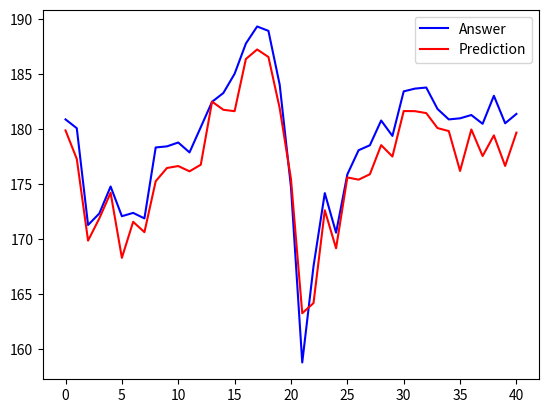

EVAL RMSE: 2.373242306195162
TEST RMSE: 2.1501695669566807
[180.93051537 176.45574141 169.74358047 172.17432188 176.51098553
 166.09746835 172.11907776 172.11907776 176.51098553 176.51098553
 176.51098553 173.58304702 176.51098553 183.94132007 183.52698915
 183.58223327 188.36084991 188.36084991 187.3664557  183.58223327
 175.24037071 159.24719711 161.45696203 172.78200723 172.83725136
 173.44493671 174.13548825 174.13548825 181.8420434  175.87567812
 183.52698915 183.52698915 183.58223327 183.58223327 183.58223327
 175.15750452 183.58223327 176.87007233 179.57703436 173.58304702
 183.52698915]


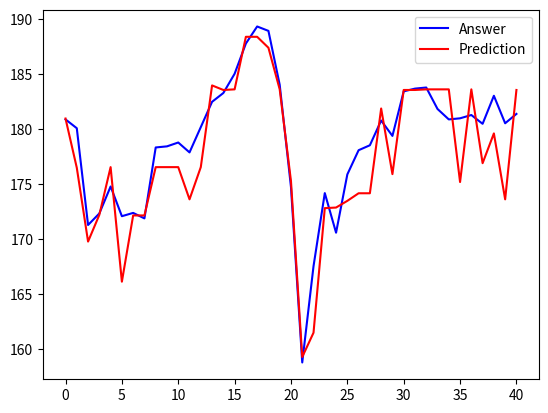

EVAL RMSE: 2.8352453860210196
TEST RMSE: 1.2706009364010982
[180.2797396  177.05845479 169.86373644 171.42134448 174.49816591
 168.3290547  171.3840547  171.33903074 176.22454476 176.75820298
 176.78333906 176.12648644 177.12999593 182.65385579 182.44807143
 182.77014467 186.62701311 187.92690732 187.4308151  183.12785036
 174.69207278 160.3136849  163.12312477 172.4505425  169.44553843
 174.81333363 176.46651401 176.6955009  179.97617315 177.37804204
 182.36824367 183.0278585  183.28584855 181.77298825 181.66581465
 178.75113472 181.87353255 178.17272875 180.59766953 177.60399051
 181.54676356]


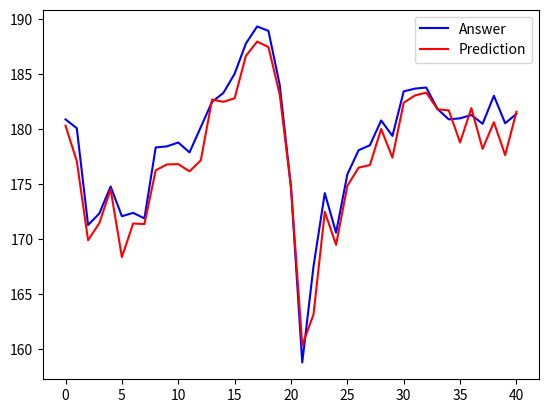

EVAL RMSE: 1.7511760169776553


In [ ]:
#eva all
models = [XGBRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
for model in models:
  model = objective(model)
  eva(model)

In [ ]:

# Print hyperparameters for each model
for model in [XGBRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]:
  print(f"\nModel: {type(model).__name__}")
  print("Hyperparameters:")
  for param, value in model.get_params().items():
    print(f"  {param}: {value}")




Model: XGBRegressor
Hyperparameters:
  objective: reg:squarederror
  base_score: None
  booster: None
  callbacks: None
  colsample_bylevel: None
  colsample_bynode: None
  colsample_bytree: None
  device: None
  early_stopping_rounds: None
  enable_categorical: False
  eval_metric: None
  feature_types: None
  gamma: None
  grow_policy: None
  importance_type: None
  interaction_constraints: None
  learning_rate: None
  max_bin: None
  max_cat_threshold: None
  max_cat_to_onehot: None
  max_delta_step: None
  max_depth: None
  max_leaves: None
  min_child_weight: None
  missing: nan
  monotone_constraints: None
  multi_strategy: None
  n_estimators: None
  n_jobs: None
  num_parallel_tree: None
  random_state: None
  reg_alpha: None
  reg_lambda: None
  sampling_method: None
  scale_pos_weight: None
  subsample: None
  tree_method: None
  validate_parameters: None
  verbosity: None

Model: DecisionTreeRegressor
Hyperparameters:
  ccp_alpha: 0.0
  criterion: squared_error
  max_depth: